# Программирование на Python, БИ

## НИУ ВШЭ, 2025-26 учебный год

### Домашнее задание №5. Математическая статистика в анализе данных

Задание выполнил(а):

    Медведев Богдан

### Общая информация

__Дата выдачи:__ 25.11.2025

__Дедлайн:__ 04:00 05.12.2025

### Оценивание и штрафы

Каждое задание в рамках данного домашнего задания оценивается в 4 балла.

Оценка за домашнее задание вычисляется по следующей формуле:

$$
s_{\text{stat}} \times 1/2 ,
$$

где $s_{\text{stat}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов.

Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) допускается исключительно в рамках справочной и образовательной информации. Любые другие случаи применения средств ИИ — например, для автоматической генерации кода по заданию — считаются плагиатом, и такое домашнее задание оценивается в 0 баллов.

В случае если в решении используются подходы, функции или формулы, не разбиравшиеся на лекциях и семинарах, — необходимо обязательное указание источника: ссылка на документацию, статью, другой ресурс. При отсутствии оформления источников задание может быть полностью обнулено.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе — указан для каждой группы в нашем телеграм-канале.

### О задании

В данном домашнем задании вы попрактикуетесь в применении методов математической статистики в анализе данных. Мы постарались подобрать для вас как можно более интересные и репрезентативные задания, максимально приближенные к тому, что реально используется при проведении A/B-тестирований и решении различных бизнес-задач в этой области.

В данном домашнем задании вам, вероятно, потребуется больше, чем обычно, осуществлять поиск информации как практического, так и теоретического характера, посредством чтения статей и различных материалов. Это ***нормально*** и лишь поможет вам глубже и качественнее, в понятном и комфортном для вас темпе, разобраться в непростом материале, связанном с математической статистикой в анализе данных.

Обратите внимание, что фактически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно*** — существенная часть баллов будет выставляться именно за выводы, так как в анализе данных в целом, — а в разделе математической статистики — в особенности, — они имеют ключевое, наиболее заметное значение.
Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*. Написанные выводы подкрепляйте выполненным кодом программы.

При выполнении заданий данного домашнего задания нет абсолютно никаких ограничений на используемые библиотеки и применяемые вами методы, функционал.

In [12]:
!pip install powerlaw

In [13]:
from scipy.stats import ttest_ind, lognorm, pareto, shapiro, chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import powerlaw

### Задание 1

Проанализируйте набор данных и ответьте на следующие вопросы:

1) Какой процент наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics — значение определенной метрики в сервисе для пользователя (например, количество кликов).

*Вместе с ответом на задание приложить код*

Сразу загрузим датасет:

In [14]:
test1 = pd.read_csv('test_1_1.csv', delimiter=';')

In [15]:
test1['metrics'].value_counts()

,count
metrics,
1,132041
2,38880
3,21902
4,14785
5,10608
...,...
367,1
314,1
269,1


Вычислим перцентилль (https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)

In [16]:
np.percentile(test1['metrics'], 5)

np.float64(1.0)

Это означает что перед определенной строкой со значением метрики 1 находится 5% от всех наблюдений

In [17]:
np.percentile(test1['metrics'], 95)

np.float64(52.0)

Аналогично это означает что перед определенной строкой со значением метрики 52 находится 95% от всех наблюдений

In [18]:
test1[test1['metrics'] < 1]

,Unnamed: 0,metrics


In [19]:
test1[test1['metrics'] > 52]

,Unnamed: 0,metrics
13,14,61
72,73,119
76,77,67
86,87,72
107,108,82
...,...,...
306782,306783,57
306801,306802,75
306812,306813,114
306824,306825,62


За 5 и 95 перцентилль выходят (если одновременно): потому что 5 перцентилль это 1, а 1 это самая маленькая цифра здесь, поэтому перед этим значением 0%

In [20]:
print((15303 + 0)/306839)

0.04987306046493438


Значит За 5 и 95 перцентилль выходят примерно 4.98% данных

https://seaborn.pydata.org/tutorial/distributions.html

https://pypi.org/project/powerlaw/

https://stackoverflow.com/questions/9378420/how-to-plot-cdf-in-matplotlib-in-python

https://www.geeksforgeeks.org/python/python-pearsons-chi-square-test/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

https://habr.com/ru/companies/skillfactory/articles/674880/

https://habr.com/ru/companies/mygames/articles/677074/

https://habr.com/ru/companies/sibur_official/articles/764248/

https://seaborn.pydata.org/tutorial/distributions.html

https://habr.com/ru/articles/556852/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats



### Задание 2

Определите, можно ли сравнить две представленные выборки t-критерием Стьюдента?

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать.

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных:

* variant — вариация в А/B тесте (например, группа А — сайт без изменений; группа B — сайт с изменениями)
* metrics — значение определенной метрики в сервисе для пользователя (например, количество кликов).

*Вместе с ответом на задание приложить код*

In [21]:
import pandas as pd

test2 = pd.read_csv('test2.csv', delimiter=';')
test2

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,B,1
2,3,A,4
3,4,B,37
4,5,B,4
...,...,...,...
184199,184200,A,12
184200,184201,A,8
184201,184202,B,11
184202,184203,B,81


Сразу же разделим выборку по разным группам А и В:

In [22]:
test_A = test2[test2['variant'] == 'A']
test_A

,Unnamed: 0,variant,metrics
0,1,A,1
2,3,A,4
7,8,A,15
9,10,A,1
11,12,A,10
...,...,...,...
184194,184195,A,4
184195,184196,A,1
184199,184200,A,12
184200,184201,A,8


In [23]:
test_B = test2[test2['variant'] == 'B']
test_B

,Unnamed: 0,variant,metrics
1,2,B,1
3,4,B,37
4,5,B,4
5,6,B,1
6,7,B,3
...,...,...,...
184196,184197,B,1
184197,184198,B,37
184198,184199,B,2
184201,184202,B,11


Вспомним условия применения t-критерия Стьюдента. Это:

**несвязные выборки**:

1. Гомогенность дисперсий — дисперсии внутри наших групп должны быть приблизительно одинаковыми

2. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)

**связные выборки**:

1. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)

У нас как раз несвязанные выборки. В контексте базового А/В-тестирования указываются несвязные выборки (Так как подбор выборок случайнен). Также на несвязность указывает наша структура данных: колонки variant и metrics (ну и ещё id некое, но оно нам не пригодится). Каждой строке соответствует положение либо до, либо после введенгия изменения, поэтому строки не могут быть явно связаны, у нас нет одинаковых айдишек.

Теперь проверим сначала гомогенность дисперсий критерием ~~Левина~~ Левена

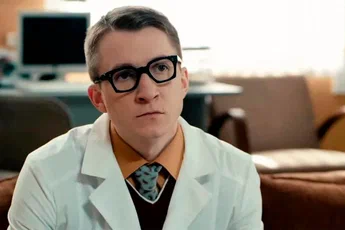

Мдаа..., сори, неудачная шутка.....

In [24]:
from scipy.stats import levene
levene(test_A['metrics'], test_B['metrics'])

LeveneResult(statistic=np.float64(4.313416821004634), pvalue=np.float64(0.03781432358426188))

Не выполняется условие гомогенности дисперсий, так как p-value=0.0378, у нас есть полномочия, монополия и основание, чтобы отклонить нулевую гипотезу Н0 (Что диспресии схожи, то есть гомогенны).

Теперь можно проверить 2 условие о нормальности распределения.

Text(0.5, 1.0, 'Распределение группы В')

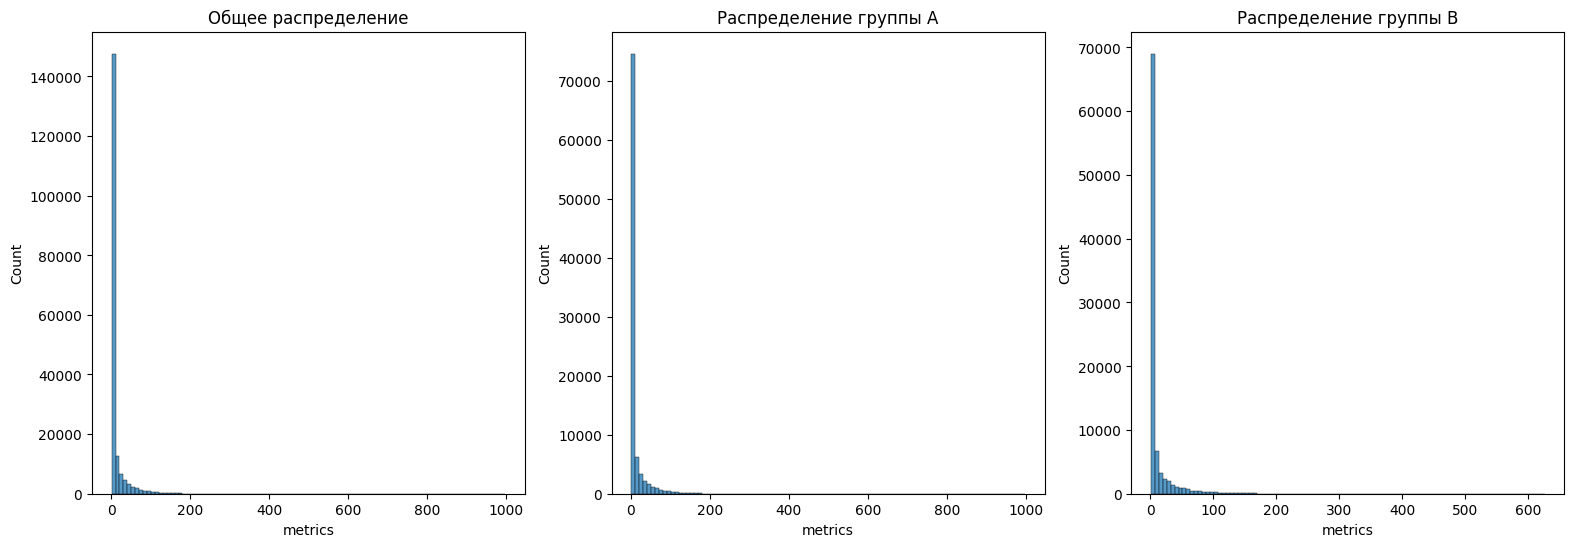

In [25]:
plt.figure(figsize=(19, 6))
plt.subplot(1, 3, 1)
sns.histplot(test2['metrics'], bins = 100)
plt.title('Общее распределение')
plt.subplot(1, 3, 2)
sns.histplot(test_A['metrics'], bins = 100)
plt.title('Распределение группы А')
plt.subplot(1, 3, 3)
sns.histplot(test_B['metrics'], bins = 100)
plt.title('Распределение группы В')

Эти графики очень нерепрезентативны (не бейте), но даже по ним видно что распределения далеки от нормального

Теперь построим QQPlot'ы:

Text(0.5, 1.0, 'Q-Q Plot для проверки нормальности для группы В')

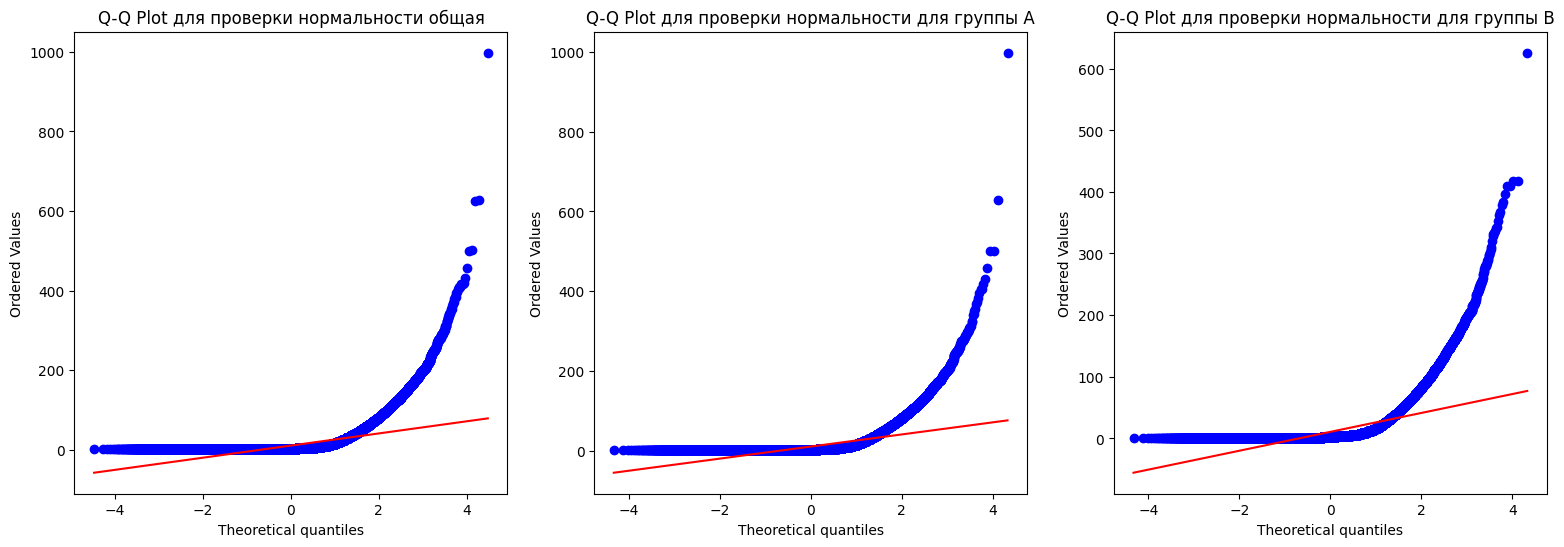

In [26]:
plt.figure(figsize=(19, 6))
plt.subplot(1, 3, 1)
st.probplot(test2['metrics'], dist="norm", plot=plt)
plt.title('Q-Q Plot для проверки нормальности общая')

plt.subplot(1, 3, 2)
st.probplot(test_A['metrics'], dist="norm", plot=plt)
plt.title('Q-Q Plot для проверки нормальности для группы А')

plt.subplot(1, 3, 3)
st.probplot(test_B['metrics'], dist="norm", plot=plt)
plt.title('Q-Q Plot для проверки нормальности для группы В')

Вот и подтверждение того что распределения не нормальны. Поэтому нельзя применить t-критерий для сравнения

Для справки: однако при очень больших количествах строк на самом деле можно использовать t-критерий не смотря на ненормальность распределений. Подробнее описано в статье на Хабр (https://habr.com/ru/articles/969226/). В случае если в датафрейме достаточно много данных, начинает выполняться Центральная предельная теорема. T-тест основан на вычислении выборочных средних, поэтому придостаточно больших количествах строк рапсределение выборочных средних стремится к нормальному распределению и нам для анализа это не помешает.

В итоге основным препятствием на нашем пути в нашем примере становится негомогенность дисперсий. Поэтому t-тест нельзя применять

Теперь разберем альтернативы:

1) Модификация t-критерия Стьюдента (https://fastercapital.com/content/Welch-s-t-test--Breaking-Barriers--Welch-s-t-test-for-Unequal-Variances.html#Introduction-to-Welchs-t-test)


> Т-критерий Уэлча — это статистический тест, который используется для сравнения средних значений двух независимых групп при неравных дисперсиях. Это модифицированная версия t-критерия Стьюдента, который предполагает равные дисперсии между сравниваемыми группами. Т-критерий Уэлча — мощный инструмент в области статистики, поскольку он позволяет исследователям сравнивать группы с неравными дисперсиями без ущерба для точности результатов. Тест назван в честь статистика Фрэнка Уэлча, который впервые предложил его в 1947 году. (ИЗ ИСТОЧНИКА ВЫШЕ)

2) Можем также воспользоваться тестом Манна-Уитни согласно материалам семинара 19. Наши данные точно не подчиняются нормальному закону, поэтому можем использовать. Однако есть мнение что этот критерий правильно использовать только для доказательства схожести рапсределений (подробности в статье на Хабре https://habr.com/ru/companies/avito/articles/709596/). При обнаружении различий статистических невозможно всегда однозначно определить в какую сторону это различие - на уменьшение или на увеличение,  что очень важно для бизнеса.

### Задание 3

Даны две выборки по А/B тесту.

Две выборки несбалансированные — кол-во пользователей в каждой группе разное.

Метрика, которую мы измеряем в эксперименте (и которую используем для определения группы, показавшей себя лучше) — количество просмотренных страниц на пользователя.

Как вы будете принимать решение, какая группа: A или B — продемонстрировала лучшие результаты? И какие статистические методы (критерии) вы будете использовать для этого? Какие преобразования к данным в целях улучшения точности и качества стоило бы применить? Сделайте это!

Если идеи не приходят в голову, рекомендуем вам дополнительно почитать про A/B тесты и работу с несбалансированными выборками.

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных:

* variant — вариация в А/B тесте (например, группа А — сайт без изменений; группа B — сайт с изменениями)
* metrics — значение определенной метрики в сервисе; в данном случае — количество просмотренных страниц на пользователя.

*Вместе с ответом на задание приложить код*

Сразу загрузим датасет:

In [27]:
test3 = pd.read_csv('test3.csv', delimiter=';')
test3

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,A,4
2,3,A,15
3,4,A,1
4,5,A,10
...,...,...,...
108094,108095,D,1
108095,108096,A,1
108096,108097,A,12
108097,108098,A,8


Вот такое распределение, почти в 6 раз разница в выборках!

In [28]:
test3['variant'].value_counts()

,count
variant,
A,92686
D,15413


Сразу разделим на группы А и D:

In [29]:
var_A = test3[test3['variant'] == 'A']
var_D = test3[test3['variant'] == 'D']

Первый вариант который пришел в голову - это сплит система, но только не для разделения на выборку А и D, а для совершенного случайного выбора из выборки А такого же количества данных которое есть во второй выборке. Она реализована с помощью хеширования

In [30]:
testA = var_A

Все что дальше будет происходить, писалось на основе этого слайда лекции о А/В тестировании

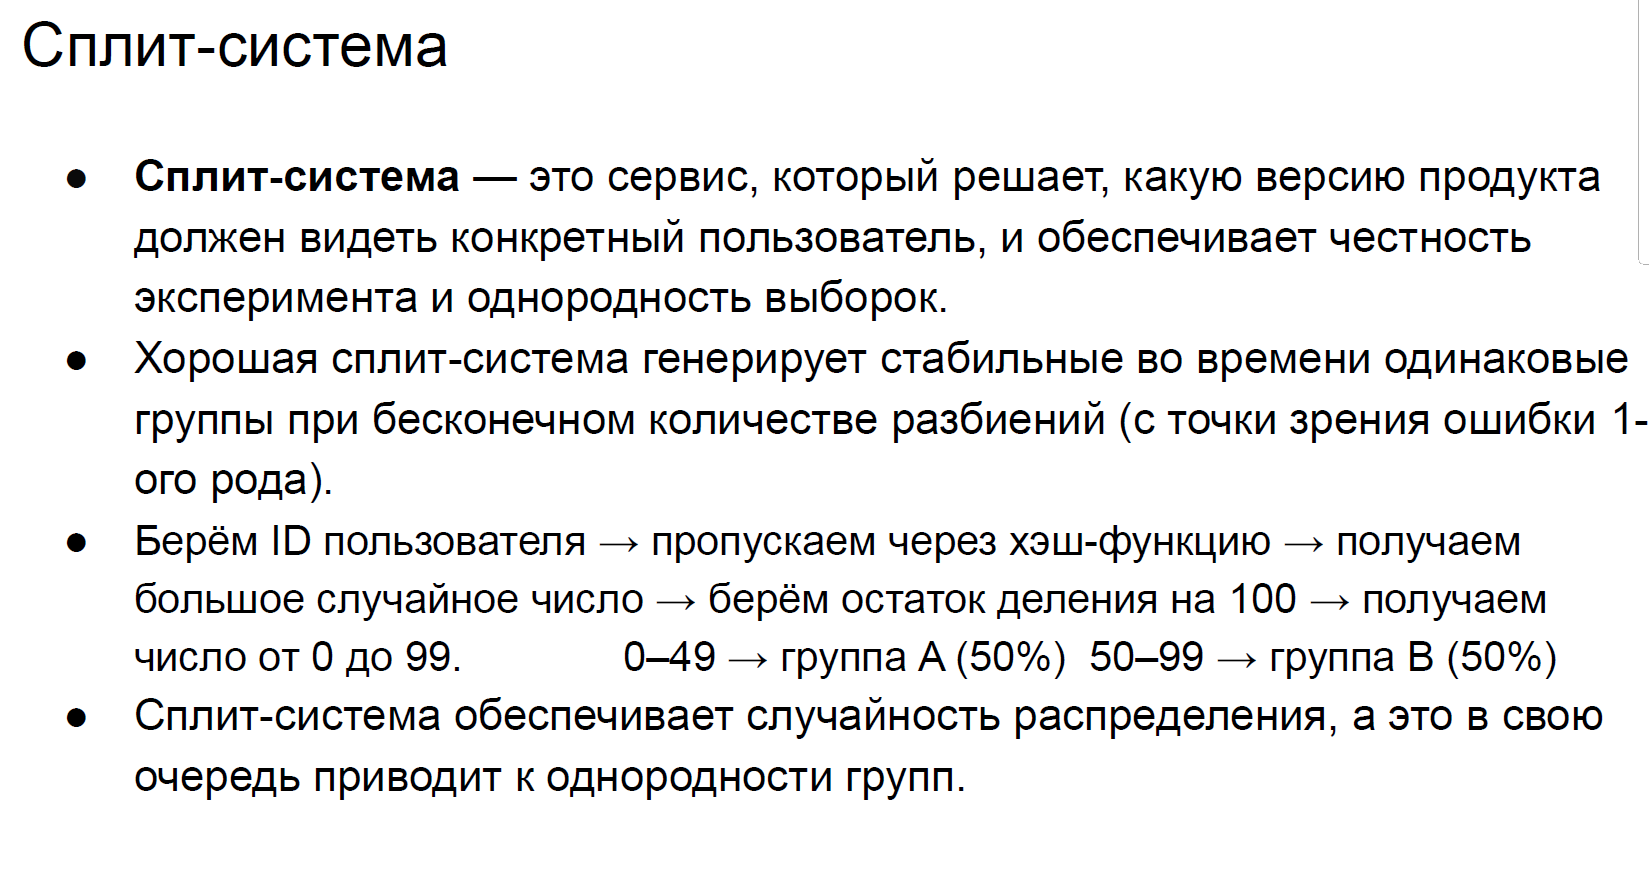

Используем библиотеку hashlib, метод md5, который будет обеспечивать случайность выборки

(документация https://www.geeksforgeeks.org/python/md5-hash-python/

https://docs.python.org/3/library/hashlib.html#hashlib.hash.hexdigest)

In [31]:
import hashlib
hash_table=[]
for i in range(1, 92687):
    hash_obj = hashlib.md5(str(i).encode())
    hash_hex = hash_obj.hexdigest()
    hash_table.append(hash_hex)

hash_table

['c4ca4238a0b923820dcc509a6f75849b',
 'c81e728d9d4c2f636f067f89cc14862c',
 'eccbc87e4b5ce2fe28308fd9f2a7baf3',
 'a87ff679a2f3e71d9181a67b7542122c',
 'e4da3b7fbbce2345d7772b0674a318d5',
 '1679091c5a880faf6fb5e6087eb1b2dc',
 '8f14e45fceea167a5a36dedd4bea2543',
 'c9f0f895fb98ab9159f51fd0297e236d',
 '45c48cce2e2d7fbdea1afc51c7c6ad26',
 'd3d9446802a44259755d38e6d163e820',
 '6512bd43d9caa6e02c990b0a82652dca',
 'c20ad4d76fe97759aa27a0c99bff6710',
 'c51ce410c124a10e0db5e4b97fc2af39',
 'aab3238922bcc25a6f606eb525ffdc56',
 '9bf31c7ff062936a96d3c8bd1f8f2ff3',
 'c74d97b01eae257e44aa9d5bade97baf',
 '70efdf2ec9b086079795c442636b55fb',
 '6f4922f45568161a8cdf4ad2299f6d23',
 '1f0e3dad99908345f7439f8ffabdffc4',
 '98f13708210194c475687be6106a3b84',
 '3c59dc048e8850243be8079a5c74d079',
 'b6d767d2f8ed5d21a44b0e5886680cb9',
 '37693cfc748049e45d87b8c7d8b9aacd',
 '1ff1de774005f8da13f42943881c655f',
 '8e296a067a37563370ded05f5a3bf3ec',
 '4e732ced3463d06de0ca9a15b6153677',
 '02e74f10e0327ad868d138f2b4fdd6f0',
 

Генерируем нашу 1 выборку! Нам нужно примерно 15413 / 92686 * 100% = 16.63% от выборки А, чтобы примерно сравнять с количеством во второй. Берем делитель 1000 и берем все те строки остааток от деления которых на 1000 меньше 166, чтобы процент выбранных сохранялся. (Мы хешируем id, все айди уникальны именно в нашем примере). Также используем так называемую "соль" для усиления случайного эффекта. (подробнее о ней https://en.wikipedia.org/wiki/Salt_%28cryptography%29)

In [32]:
new_hash_dec = []
selected_flags = []
salt='abc123'
for i in range(92686):
    decimal_hash = int(f"{salt}{hash_table[i]}", 16)
    if decimal_hash % 1000 <= 166:
        selected_flags.append(True)
    else:
        selected_flags.append(False)


testA['selected'] = selected_flags

/tmp/ipython-input-343068397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testA['selected'] = selected_flags


Записываем берем или не берем строку в столбец selected: False/True

Аналогично, но меняем делитель и "соль", мы хотим посмотреть насколько случайно рапсределялись строки

In [33]:
selected_flags = []
salt='dce658'
for i in range(92686):
    decimal_hash = int(f"{salt}{hash_table[i]}", 16)
    if decimal_hash % 2237 <= 372:
        selected_flags.append(True)
    else:
        selected_flags.append(False)


testA['selected2'] = selected_flags

/tmp/ipython-input-3000863646.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testA['selected2'] = selected_flags


In [34]:
testA

,Unnamed: 0,variant,metrics,selected,selected2
0,1,A,1,False,False
1,2,A,4,False,True
2,3,A,15,True,False
3,4,A,1,True,False
4,5,A,10,False,False
...,...,...,...,...,...
108093,108094,A,4,False,False
108095,108096,A,1,False,False
108096,108097,A,12,False,False
108097,108098,A,8,False,False


Количество строк взятых:

In [35]:
testA[testA['selected'] == True].count()

,0
Unnamed: 0,15720
variant,15720
metrics,15720
selected,15720
selected2,15720


In [36]:
testA[testA['selected2'] == True].count()

,0
Unnamed: 0,15582
variant,15582
metrics,15582
selected,15582
selected2,15582


Из колонок видно на первый взгляд что значения не повторяются. Проверим более сильными методами:

(https://www.includehelp.com/python/tilde-sign-in-pandas-dataframe.aspx)

In [37]:
print(sum(testA['selected'] & testA['selected2']))
print(sum(testA['selected'] & ~testA['selected2']))
print(sum(~testA['selected'] & testA['selected2']))

2586
13134
12996


Это означает что степень случайности ограничивается 2586 / 15413 * 100 = 16.7%. В принципе в зависимости от целей приемлемость результата данного может различаться

Также посмотрим насколько совпадают и идентичны эти выборки, для этого выделим сначала их. Это будет выглядеть как А/А тест

In [38]:
test3_AA = testA[testA['selected'] == True]

In [39]:
test3_AAA = testA[testA['selected2'] == True]

In [40]:
test3_AA

,Unnamed: 0,variant,metrics,selected,selected2
2,3,A,15,True,False
3,4,A,1,True,False
15,16,A,1,True,True
24,25,A,12,True,False
29,30,A,41,True,True
...,...,...,...,...,...
108060,108061,A,36,True,False
108068,108069,A,22,True,True
108069,108070,A,2,True,False
108079,108080,A,5,True,False


In [41]:
test3_AAA

,Unnamed: 0,variant,metrics,selected,selected2
1,2,A,4,False,True
10,11,A,2,False,True
11,12,A,4,False,True
15,16,A,1,True,True
17,18,A,1,False,True
...,...,...,...,...,...
108078,108079,A,5,False,True
108086,108087,A,26,False,True
108087,108088,A,1,False,True
108088,108089,A,2,False,True


Применяем довольно-таки универсальный тест Колмогорова-Смирнова (о нем в конце этой статьи https://habr.com/ru/companies/skillfactory/articles/674880/)

In [42]:
d_statistic, p_value = st.kstest(test3_AA['metrics'], test3_AAA['metrics'])
d_statistic, p_value

(np.float64(0.00569219622171202), np.float64(0.9603901953186298))

Итак! p-value = 0.96, это значит что у нас нет оснований отвергать нулевую гипотезу Н0 (то что распределения идентичны). Это до конца доказывает случайность наших выборок!

Теперь самое главное - наш А/В тест! Попарно сравним и проанализируем выходные данные:

In [43]:
d_statistic, p_value = st.kstest(test3_AA['metrics'], var_D['metrics'])
d_statistic, p_value

(np.float64(0.006756151948001943), np.float64(0.8670852783513705))

Pvalue=0.86, это очень интересно потому что это доказывает что наша нулевая гипотеза Н0 (группа В схожа с группой А). А/В-тест не показал улучшений

In [44]:
d_statistic, p_value = st.kstest(test3_AAA['metrics'], var_D['metrics'])
d_statistic, p_value

(np.float64(0.007596719836781118), np.float64(0.7594382910758669))

Pvalue=0.759, это немного меньше предыдущего, но вердикт такой же, что группа В не продемонстрировала результаты ни лучше ни хуже. Это означает что эффекта от внедрения нововведения бизнеса не произошло.

Конечно существуют более продвинутые методы работы с несбалансированными выборками, но они применяются непосредственно в компаниях. А так базово - вот этот вышеописанный метод, можно сказать классика А/В-тестирования

### Задание 4

Есть данные с большой дисперсией у метрики — дисперсию метрики можно посчитать для каждой группы. Для дальнейшего анализа этих данных дисперсию необходимо сократить.

Как определить, что дисперсия действительно большая? Если она большая, то как вы будете ее чистить?

Ответ аргументировать и описать.

Если идеи не приходят в голову, рекомендуем вам дополнительно почитать про A/B тесты и снижение дисперсии в них.

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics — значение определенной метрики в сервисе для пользователя (например, количество кликов).

*Вместе с ответом на задание приложить код*

Сразу загрузим наш датасет и выведем основные характеристики методом describe

In [45]:
test4 = pd.read_csv('test_1_1.csv', delimiter=';')

In [46]:
test4

,Unnamed: 0,metrics
0,1,1
1,2,1
2,3,4
3,4,1
4,5,1
...,...,...
306834,306835,8
306835,306836,11
306836,306837,1
306837,306838,81


In [47]:
test4.describe()

,Unnamed: 0,metrics
count,306839.000000,306839.000000
mean,153420.000000,10.146275
std,88576.933961,22.627378
min,1.000000,1.000000
25%,76710.500000,1.000000
50%,153420.000000,2.000000
75%,230129.500000,7.000000
max,306839.000000,998.000000


Насчет среднего и медианы: такое же различие как в задании 1, более чем в 5 раз (датасеты одинаковые).

Фактически дисперсия является квадратом стандартного отклонения. Осталось оценить, насколько она большая и неприемлемая для нашего распределения. Для этого используют коэффициент вариации (https://ru.wikipedia.org/wiki/Коэффициент_вариации). Вычислим его, это стандартное отклонение поделенное на среднее: 22.627378 / 10.146275 = 2.23. Это означает, что дисперсия слишком высока (CV>1) и нам нужно срочно ее снижать.

Первый метод: логарифмирование (хотя и оно используется в большинстве случаев для анализа временных рядов https://ivan-shamaev.ru/time-series-analysis-forecasting-and-models-python-libraries/ https://tidydata.ru/forecasting), но подходит в контексте выхода, который можно анализировать наиболее удобно и с пониженной дисперсией.

Давайте проверим это:

In [48]:
test4_log = np.log(test4['metrics'])

In [49]:
test4_log.describe()

,metrics
count,306839.000000
mean,1.153210
std,1.348784
min,0.000000
25%,0.000000
50%,0.693147
75%,1.945910
max,6.905753


Действительно! Дисперсия уменьшилась в разы, только на выходе теперь придется сравнивать логарифмированные данные. (Также ограничение - значения метрики должны быть положительные)

Второй метод: Винзоризация (https://en.wikipedia.org/wiki/Winsorizing).

Заключается в преобразовании экстримально больших значений (вероятно выбросов) метрики в значениие некого установленного перцентилля (мы берем 99). Как раз эти значения увеличивают дисперсию. На тесте это обычно не сказывается, так как их доля экстримальна мала.

Находим значение 99 перцентилля:

In [50]:
np.percentile(test4['metrics'], 99)

np.float64(112.0)

In [51]:
test4[test4['metrics'] > 112]

,Unnamed: 0,metrics
72,73,119
218,219,132
464,465,128
521,522,153
540,541,122
...,...,...
306486,306487,164
306574,306575,243
306721,306722,181
306765,306766,278


Это 2986 / 306839 = 0.0098 доля, что предельно мало

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

Заменяем все что выходит за 99 перцентилль на значение 52

In [52]:
test4[test4['metrics'] >= 112] = 112

In [53]:
test4.describe()

,Unnamed: 0,metrics
count,306839.000000,306839.000000
mean,151825.159214,9.719130
std,89399.834778,19.492435
min,1.000000,1.000000
25%,74390.500000,1.000000
50%,151791.000000,2.000000
75%,229232.000000,7.000000
max,306839.000000,112.000000


Стандартное отклонение уменьшилось примерно с 22 до 19, не много, но эффект есть, дисперсия тоже, мы добились этого.

Можно сделать и с установкой перцентилля 95, но это надо делать очень осторожно.

Хочется ещё раз отметить, что эти методы в большинстве своем не оказывают влияния на будущий анализ. Логарифмирование применяется обычно и к группе А и к группе В, что ставит эти выборки в равные условия. Винзоризация прибегает к незначительному изменению на общем фоне.

### Задание 5

В компании проводится эксперимент с поисковыми подсказками. Вы хотите определить, как изменился CTR в каждой группе эксперимента.

Задача:
- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

Описание данных:
- id — уникальный идентификатор пользователя
- action — 🕊️
- view — количество просмотров на одну сессию
- variant — вариация в А/B тесте, где 0 — это версия "A", 1 —  версия "B".

*Вместе с ответом на задание приложить код*


Загрузим csv-файл:

In [54]:
test5 = pd.read_csv('task5.csv')
test5

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1
...,...,...,...,...
8186,7706713,B,1,1
8187,7875223,B,1,1
8188,4617329,B,9,4
8189,5394863,B,5,1


In [55]:
test5['variant'].value_counts()

,count
variant,
A,4646
B,3545


Получилось всего 8191 строк, из них в ситуации "ДО" 4646 строк, "ПОСЛЕ" 3545 строк. Разница 1101 строка не существенна в контексте A/B-тестировани (группа А больше группы В на около 24%)

Так как нам надо оценить показатель CTR, то создадим новый признак CTR в общем датафрейме. Для этого разделим показатель активности (количество целевых дейвствий) на количество показов. Получается такая измененная таблица, CTR тут указан в долях:

In [56]:
test5['ctr'] = test5['action'] / test5['view']
test5

,id,variant,view,action,ctr
0,88258,A,10,2,0.200000
1,109938,A,3,1,0.333333
2,117644,A,7,5,0.714286
3,374080,A,9,9,1.000000
4,662082,A,1,1,1.000000
...,...,...,...,...,...
8186,7706713,B,1,1,1.000000
8187,7875223,B,1,1,1.000000
8188,4617329,B,9,4,0.444444
8189,5394863,B,5,1,0.200000


Разделим выборки на группы А и В:

In [57]:
testA = test5[test5['variant'] == 'A']
testB = test5[test5['variant'] == 'B']

Посмотрим на основную имнформацию о распределениях данных в отдельности с помощью метода discribe:

In [58]:
testA.describe()

,id,view,action,ctr
count,4.646000e+03,4646.000000,4646.000000,4646.000000
mean,6.647421e+06,4.369996,2.662290,0.761584
std,1.322262e+06,3.774225,2.499392,0.298789
min,8.825800e+04,1.000000,1.000000,0.066667
25%,5.661734e+06,1.000000,1.000000,0.500000
50%,7.151583e+06,3.000000,1.000000,1.000000
75%,7.699936e+06,7.000000,4.000000,1.000000
max,8.390884e+06,22.000000,21.000000,1.000000


In [59]:
testB.describe()

,id,view,action,ctr
count,3.545000e+03,3545.000000,3545.000000,3545.000000
mean,6.670514e+06,4.480395,2.715656,0.756498
std,1.307472e+06,3.771885,2.488199,0.300542
min,3.610670e+05,1.000000,1.000000,0.058824
25%,5.705911e+06,1.000000,1.000000,0.500000
50%,7.174053e+06,4.000000,1.000000,1.000000
75%,7.692037e+06,8.000000,4.000000,1.000000
max,8.381999e+06,22.000000,18.000000,1.000000


Заметим, что в обеих группах у показателя CTR строки от 100% перцентилля до 50% перцентилля имеют значение 1. Медиана равна 1, а среднее арифметическое - 0.756498.

Попытаемся построить распределение показателя CTR с помощью боксплота и вайолинплота.

Для группы А:       /        Для группы В:

{'whiskers': [<matplotlib.lines.Line2D at 0x7f465ef235f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f465ef23b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f465ef232c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f465ed4c110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f465ed4c3b0>],
 'means': []}

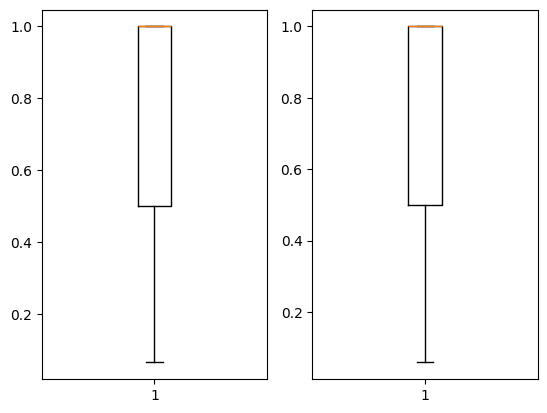

In [60]:
plt.subplot(1, 2, 1)
plt.boxplot(testA['ctr'])

plt.subplot(1, 2, 2)
plt.boxplot(testB['ctr'])

ViolinPlot:

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x7f465edce330>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f465edce750>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f466201eea0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f4684ccc530>}

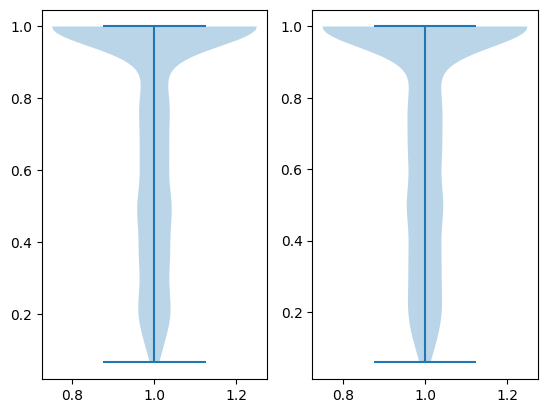

In [61]:
plt.subplot(1, 2, 1)
plt.violinplot(testA['ctr'])

plt.subplot(1, 2, 2)
plt.violinplot(testB['ctr'])

На графиках видно большое преобладание значений 1.

In [62]:
X_mean_a = np.mean(testA['ctr'])
X_mean_b = np.mean(testB['ctr'])

На гистограмме рапсределения виден серьезный перекос значений 1.

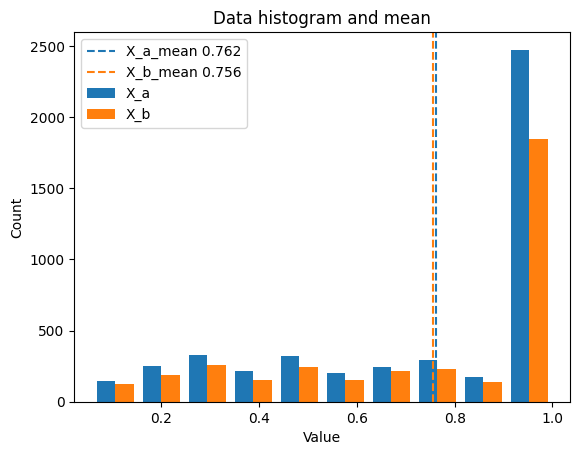

In [63]:
plt.hist([testA['ctr'], testB['ctr']])
plt.axvline(x=X_mean_a, color='C0', linestyle='--')
plt.axvline(x=X_mean_b, color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['X_a_mean %.3f' % X_mean_a,
            'X_b_mean %.3f' % X_mean_b,
            'X_a', 'X_b']);

Попытаемся понять почему возникла такая ситуация. Вероятно учитываются строки с признаками view и action 1 и 1 соответственно. Посчитаем сколько таких:

In [64]:
test5[(test5['action'] == 1) & (test5['view'] == 1)]

,id,variant,view,action,ctr
4,662082,A,1,1,1.0
6,1138382,A,1,1,1.0
11,1785108,A,1,1,1.0
14,2320334,A,1,1,1.0
22,2475180,A,1,1,1.0
...,...,...,...,...,...
8181,7337647,B,1,1,1.0
8184,7965521,B,1,1,1.0
8186,7706713,B,1,1,1.0
8187,7875223,B,1,1,1.0


Ничего себе, таких строк 3359 - очень много! (почти 30% датасета). Это люди возможно случайно попавшие и воспользовавшиеся поисковой строкой, будет верно их не учитывать, потому что они очень вероятно не целевая аудитория поиска. Такие данные не содержат сравнительной характеристике для групп А и В, поэтому ичтываем пользователей со значением view>=2.

In [65]:
testA = testA[testA['view'] >= 2]

In [66]:
testA

,id,variant,view,action,ctr
0,88258,A,10,2,0.200000
1,109938,A,3,1,0.333333
2,117644,A,7,5,0.714286
3,374080,A,9,9,1.000000
5,1132588,A,10,2,0.200000
...,...,...,...,...,...
4484,8058498,A,2,1,0.500000
4506,8072666,A,3,1,0.333333
4521,8079958,A,2,1,0.500000
4523,8083228,A,2,1,0.500000


In [67]:
testB = testB[testB['view'] >= 2]

In [68]:
testB

,id,variant,view,action,ctr
4647,6919535,B,8,5,0.625000
4651,5365313,B,9,4,0.444444
4653,6652787,B,10,8,0.800000
4654,6111637,B,10,3,0.300000
4655,7100409,B,2,1,0.500000
...,...,...,...,...,...
8182,3349905,B,17,5,0.294118
8183,4570113,B,4,2,0.500000
8185,7739847,B,5,4,0.800000
8188,4617329,B,9,4,0.444444


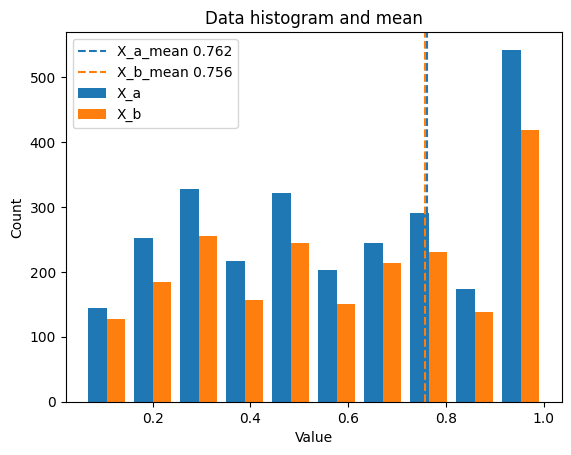

In [69]:
plt.hist([testA['ctr'], testB['ctr']])
plt.axvline(x=X_mean_a, color='C0', linestyle='--')
plt.axvline(x=X_mean_b, color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['X_a_mean %.3f' % X_mean_a,
            'X_b_mean %.3f' % X_mean_b,
            'X_a', 'X_b']);

In [70]:
testA.describe()

,id,view,action,ctr
count,2.715000e+03,2715.000000,2715.000000,2715.000000
mean,6.008669e+06,6.766851,3.844567,0.592014
std,1.287934e+06,3.248457,2.706906,0.289112
min,8.825800e+04,2.000000,1.000000,0.066667
25%,5.318245e+06,4.000000,2.000000,0.333333
50%,6.082266e+06,6.000000,3.000000,0.600000
75%,7.067912e+06,9.000000,5.000000,0.833333
max,8.112262e+06,22.000000,21.000000,1.000000


In [71]:
testB.describe()

,id,view,action,ctr
count,2.117000e+03,2117.000000,2117.000000,2117.000000
mean,6.068519e+06,6.828059,3.872933,0.592246
std,1.294538e+06,3.184275,2.653850,0.290305
min,3.610670e+05,2.000000,1.000000,0.058824
25%,5.355051e+06,4.000000,2.000000,0.333333
50%,6.202317e+06,6.000000,3.000000,0.600000
75%,7.115955e+06,9.000000,5.000000,0.833333
max,8.062121e+06,22.000000,18.000000,1.000000


О! Сейчас данные намного лучше, перекос понизился

Теперь используем Two-Sample Z-Test for Proportions (источник:https://www.qualitygurus.com/two-proportions-z-test-or-two-sample-z-test-for-proportions/, тут для языка R но суть та же: https://www.geeksforgeeks.org/r-language/two-proportions-z-test-in-r-programming/)

Документация на используемую библиотеку:

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

Мы можем применить этот критерий, так как:

1) Испытания независимы (под испытаниями мы понимаем здесь суммарные показы, под успехом - клик (целевое действие пользователя)

2) Бинарный исход (при аггрегировании данных, все вместе воспринимается как эксперимент Бернулли, успех - клик пользователя, суммарное количество испытаний - количество показов)

3) Размер выборки должен быть достаточно большим, чтобы обеспечить нормальное распределение долей в выборке. В частности, и np, и n(1−p) должны быть не меньше 10 для обеих выборок. Критерий выполняется:

In [72]:
views_a = np.sum(testA['view'])
clicks_a = np.sum(testA['action'])
views_b = np.sum(testB['view'])
clicks_b = np.sum(testB['action'])

Проверка условия №3, как видно: все из значений не меньше 10:

In [73]:
pa = clicks_a / views_a
views_a * pa, views_a * (1 - pa)

(np.float64(10438.0), np.float64(7933.999999999999))

In [74]:
pb = clicks_b / views_b
views_b * pb, views_b * (1 - pb)

(np.float64(8199.0), np.float64(6256.0))

Само применение z-критерия

In [75]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([clicks_a, clicks_b], [views_a, views_b])

(np.float64(0.1704139747979601), np.float64(0.8646845825906349))

Pvalue здесь равен чуть более 0.86, что достаточно много (при общепринятом пороге 0.05). Поэтому у нас нет оснований отвергать нулевую гипотезу Н0 (То что CTR в двух группах тестирования А и В не отличается и схож). Поэтому эффекта от внедрения нововведения нет.